In [13]:
import pandas as pd

In [14]:
df = pd.read_csv('/Users/pbhagwat/DEV/CohortAnalysis/Cohort-Analysis/Data/Telco-Customer-Churn.csv')

In [15]:
pd.set_option('display.max_columns', 100)

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
dummies = pd.get_dummies(
        df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
                  'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                  'StreamingTV',
                  'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]
    )
dummies = dummies[['gender_Female', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check','Churn_Yes']]

In [18]:
data = dummies.join(df[['customerID','MonthlyCharges', 'TotalCharges','tenure']])

In [19]:
data.set_index('customerID', inplace=True)
data['TotalCharges'] = data[['TotalCharges']].replace([' '], '0')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [20]:
data.head()

,gender_Female,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,Churn_Yes,MonthlyCharges,TotalCharges,tenure
customerID,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,29.85,29.85,1
5575-GNVDE,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,56.95,1889.50,34
3668-QPYBK,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,53.85,108.15,2
7795-CFOCW,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,1,0,0,0,42.30,1840.75,45
9237-HQITU,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,70.70,151.65,2


In [21]:
from lifelines import CoxPHFitter 
from sklearn.model_selection import train_test_split

In [22]:
x_select = ['gender_Female', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check','MonthlyCharges', 'TotalCharges','tenure', 'Churn_Yes']
temp_x_select = ['gender_Female','Contract_One year','Contract_Two year','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','InternetService_DSL', 'InternetService_Fiber optic','MonthlyCharges', 'TotalCharges', 'tenure', 'Churn_Yes']

In [23]:
cph_train, cph_test = train_test_split(data[x_select], test_size=0.2)

In [24]:
cph = CoxPHFitter()
cph.fit(cph_train, 'tenure', 'Churn_Yes')

<lifelines.CoxPHFitter: fitted with 5634 total observations, 4154 right-censored observations>

In [25]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 5634 total observations, 4154 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn_Yes'
      baseline estimation = breslow
   number of observations = 5634
number of events observed = 1480
   partial log-likelihood = -9686.22
         time fit was run = 2020-10-10 10:22:50 UTC

---
                                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                       
gender_Female                             0.05       1.05       0.05            -0.05             0.15                 0.95                 1.16
Partner_Yes                              -0.18       0.83       0.06            -0.30            -0.06                 0.74                 0.94
Dependents_Yes                           -0.11       0.90       0.08            -0.26             0.04                 0.77                 1.04
PhoneService_Yes                          1.14       3.11       0.24             0.66             1.61                 1.93                 5.03
MultipleLines_Yes                         0.20       1.22       0.08             0.04             0.35                 1.04                 1.42
InternetService_DSL                       2.70      14.84       0.34             2.04             3.35                 7.69                28.64
InternetService_Fiber optic               4.09      59.49       0.58             2.94             5.23                18.94               186.87
OnlineSecurity_Yes                       -0.10       0.91       0.09            -0.28             0.08                 0.76                 1.09
DeviceProtection_Yes                      0.16       1.18       0.08             0.00             0.32                 1.00                 1.38
TechSupport_Yes                          -0.02       0.98       0.09            -0.20             0.16                 0.82                 1.17
StreamingTV_Yes                           0.42       1.52       0.12             0.17             0.66                 1.19                 1.94
StreamingMovies_Yes                       0.45       1.57       0.12             0.21             0.69                 1.23                 2.00
Contract_One year                        -1.35       0.26       0.12            -1.57            -1.12                 0.21                 0.33
Contract_Two year                        -3.62       0.03       0.22            -4.05            -3.18                 0.02                 0.04
PaperlessBilling_Yes                      0.15       1.16       0.06             0.02             0.27                 1.03                 1.32
PaymentMethod_Bank transfer (automatic)  -0.48       0.62       0.10            -0.67            -0.29                 0.51                 0.75
PaymentMethod_Credit card (automatic)    -0.52       0.60       0.10            -0.72            -0.32                 0.49                 0.73
PaymentMethod_Electronic check           -0.14       0.87       0.08            -0.29             0.02                 0.75                 1.02
MonthlyCharges                           -0.00       1.00       0.01            -0.02             0.02                 0.98                 1.02
TotalCharges                             -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00

                                             z      p   -log2(p)
covariate                                                       
gender_Female                             0.94   0.35       1.52
Partner_Yes                              -3.00 <0.005       8.54
Dependents_Yes                           -1.44   0.15       2.73
PhoneService_Yes                          4.65 <0.005      18.18
MultipleLines_Yes                         2.42   0.

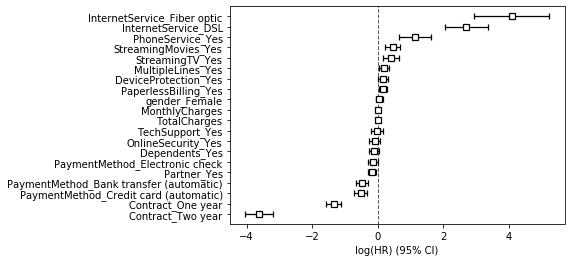

In [26]:
cph.plot()

Text(0.5, 0, 'tenure period')

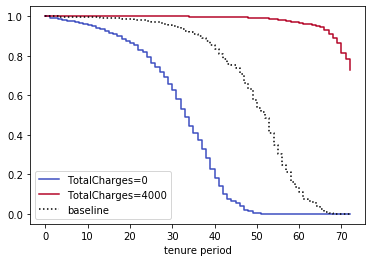

In [27]:
cph.plot_partial_effects_on_outcome('TotalCharges',values=[0,4000], cmap='coolwarm').set_xlabel('tenure period')

## Churn Prediction
### Next step is to derive some insights and to make predictions of the existing customer behaviour 

In [28]:
# censored observation is one which is yet to have an ‘event’, i.e. customers who are yet to churn.
censored_subjects = data.loc[data['Churn_Yes']==0] 
print("Number of customers yet to churn:", len(censored_subjects))

Number of customers yet to churn: 5174


In [29]:
# predict_survival_function() creates the matrix containing a survival probability for each remaining customers 
#'unconditioned' survival function 'cuz some of these curves will predict churn before the customer's current tenure time
# row index => tenure period; column_index is the data index where Churn_Yes=0
unconditioned_sf = cph.predict_survival_function(censored_subjects)

In [30]:
unconditioned_sf.head()

,7590-VHVEG,5575-GNVDE,7795-CFOCW,1452-KIOVK,6713-OKOMC,6388-TABGU,9763-GRSKD,7469-LKBCI,8091-TTVAX,5129-JLPIS,3655-SNQYZ,8191-XWSZG,9959-WOFKT,4183-MYFRB,1680-VDCWW,3638-WEABW,6322-HRPFA,6865-JZNKO,5248-YGIJN,3841-NFECX,4929-XIHVW,6827-IEAUQ,7310-EGVHZ,3413-BMNZE,6234-RAAPL,6572-ADKRS,8865-TNMNX,9489-DEDVP,9867-JCZSP,4671-VJLCL,4080-IIARD,3714-NTNFO,5948-UJZLF,7639-LIAYI,2954-PIBKO,8012-SOUDQ,6575-SUVOI,4667-QONEA,8769-KKTPH,5067-XJQFU,3957-SQXML,5954-BDFSG,0434-CSFON,1215-FIGMP,0526-SXDJP,0557-ASKVU,5122-CYFXA,8627-ZYGSZ,3410-YOQBQ,3170-NMYVV,...,1904-WAJAA,5130-YPIRV,2843-CQMEG,6439-PKTRR,5351-QESIO,5568-DMXZS,8468-FZTOE,6633-SYEUS,6447-GORXK,6967-PEJLL,5981-ZVXOT,1684-FLBGS,1389-WNUIB,0376-OIWME,0218-QNVAS,0804-YGEQV,7164-BPTUT,2523-EWWZL,0928-XUTSN,0052-YNYOT,9586-JGQKH,4501-VCPFK,6075-SLNIL,9347-AERRL,2274-XUATA,6691-CCIHA,1685-BQULA,9053-EJUNL,0666-UXTJO,1471-GIQKQ,4807-IZYOZ,9710-NJERN,9837-FWLCH,7203-OYKCT,1035-IPQPU,7398-LXGYX,2823-LKABH,0550-DCXLH,9281-CEDRU,2235-DWLJU,0871-OPBXW,3605-JISKB,9767-FFLEM,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,3186-AJIEK
0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1.0,0.972435,0.998676,0.999715,0.981067,0.980717,0.999952,0.969722,0.999933,0.999982,0.987532,1.0,0.999628,1.0,0.963276,0.999318,0.999993,0.999668,0.994183,1.0,1.0,0.633345,0.998971,0.995786,0.943517,1.0,0.998886,0.990962,0.999999,0.999267,0.999999,0.971366,0.998539,0.917503,0.999995,0.999998,0.998435,0.994190,0.999983,0.999994,0.999997,0.999975,1.0,0.999413,0.999920,0.999996,0.996514,0.850085,0.999708,0.999865,0.999979,...,0.999809,0.999997,0.983641,1.000000,0.971571,0.938223,0.999999,0.989058,0.994981,0.999422,0.999205,0.993255,0.997508,0.996915,0.999999,0.999747,0.999998,0.988177,0.881110,0.999807,1.000000,0.993633,0.998437,0.999582,0.999999,0.999999,0.998515,0.997966,0.996103,0.918726,0.999976,0.999947,0.996377,0.999998,0.999966,0.999152,0.958629,0.950411,0.999998,0.947563,0.991948,0.999931,0.996000,0.962502,0.993741,0.999985,0.997337,0.999999,0.986424,1.000000
2.0,0.958960,0.998015,0.999573,0.971749,0.971230,0.999928,0.954951,0.999899,0.999973,0.981365,1.0,0.999442,1.0,0.945450,0.998978,0.999990,0.999502,0.991292,1.0,1.0,0.504214,0.998457,0.993689,0.916525,1.0,0.998330,0.986480,0.999999,0.998901,0.999998,0.957380,0.997810,0.878902,0.999992,0.999997,0.997655,0.991302,0.999974,0.999992,0.999996,0.999962,1.0,0.999120,0.999881,0.999994,0.994778,0.783878,0.999562,0.999797,0.999969,...,0.999713,0.999996,0.975575,0.999999,0.957683,0.908826,0.999999,0.983641,0.992485,0.999134,0.998808,0.989905,0.996266,0.995378,0.999998,0.999621,0.999997,0.982326,0.827157,0.999710,1.000000,0.990470,0.997657,0.999374,0.999999,0.999998,0.997774,0.996952,0.994163,0.880658,0.999964,0.999921,0.994573,0.999997,0.999949,0.998729,0.938621,0.926583,0.999997,0.922424,0.987953,0.999897,0.994010,0.944311,0.990632,0.999978,0.996011,0.999998,0.979716,1.000000
3.0,0.945782,0.997361,0.999433,0.962598,0.961913,0.999904,0.940527,0.999866,0.999964,0.975289,1.0,0.999258,1.0,0.928100,0.998641,0.999986,0.999337,0.988433,1.0,1.0,0.402182,0.997948,0.991614,0.890522,1.0,0.997779,0.982056,0.999998,0.998539,0.999997,0.943710,0.9

In [31]:
# We've to condition the prediction on the basis that the customers were still with us when the data was collected
# c.name => row number(index) of the data where Churn_Yes=0
# data.loc[c.name, 'tenure'] => tenure value of specific index(c.name) in original data
# c.loc[data.loc[c.name, 'tenure']]<=1 always in unconditioned_cf, which may not be true cuz the customers might continue using the platform even after the date of collection of data
conditioned_sf = unconditioned_sf.apply(lambda c:(c/c.loc[data.loc[c.name, 'tenure']]).clip(upper=1))

In [32]:
conditioned_sf.head()

,7590-VHVEG,5575-GNVDE,7795-CFOCW,1452-KIOVK,6713-OKOMC,6388-TABGU,9763-GRSKD,7469-LKBCI,8091-TTVAX,5129-JLPIS,3655-SNQYZ,8191-XWSZG,9959-WOFKT,4183-MYFRB,1680-VDCWW,3638-WEABW,6322-HRPFA,6865-JZNKO,5248-YGIJN,3841-NFECX,4929-XIHVW,6827-IEAUQ,7310-EGVHZ,3413-BMNZE,6234-RAAPL,6572-ADKRS,8865-TNMNX,9489-DEDVP,9867-JCZSP,4671-VJLCL,4080-IIARD,3714-NTNFO,5948-UJZLF,7639-LIAYI,2954-PIBKO,8012-SOUDQ,6575-SUVOI,4667-QONEA,8769-KKTPH,5067-XJQFU,3957-SQXML,5954-BDFSG,0434-CSFON,1215-FIGMP,0526-SXDJP,0557-ASKVU,5122-CYFXA,8627-ZYGSZ,3410-YOQBQ,3170-NMYVV,...,1904-WAJAA,5130-YPIRV,2843-CQMEG,6439-PKTRR,5351-QESIO,5568-DMXZS,8468-FZTOE,6633-SYEUS,6447-GORXK,6967-PEJLL,5981-ZVXOT,1684-FLBGS,1389-WNUIB,0376-OIWME,0218-QNVAS,0804-YGEQV,7164-BPTUT,2523-EWWZL,0928-XUTSN,0052-YNYOT,9586-JGQKH,4501-VCPFK,6075-SLNIL,9347-AERRL,2274-XUATA,6691-CCIHA,1685-BQULA,9053-EJUNL,0666-UXTJO,1471-GIQKQ,4807-IZYOZ,9710-NJERN,9837-FWLCH,7203-OYKCT,1035-IPQPU,7398-LXGYX,2823-LKABH,0550-DCXLH,9281-CEDRU,2235-DWLJU,0871-OPBXW,3605-JISKB,9767-FFLEM,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,3186-AJIEK
0.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2.0,0.986143,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,0.997894,0.971392,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.985705,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.958565,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3.0,0.972592,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.797641,1.0,0.995810,0.943833,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.958274,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.971733,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.919174,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.996006,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4.0,0.958735,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.630921,1.0,0.993654,0.916078,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.916840,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.92,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.957451,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.880032,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.991881,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [33]:
import matplotlib.pyplot as plt

In [34]:
customer = '1452-KIOVK'

In [35]:
df.loc[df['customerID'] == customer]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No


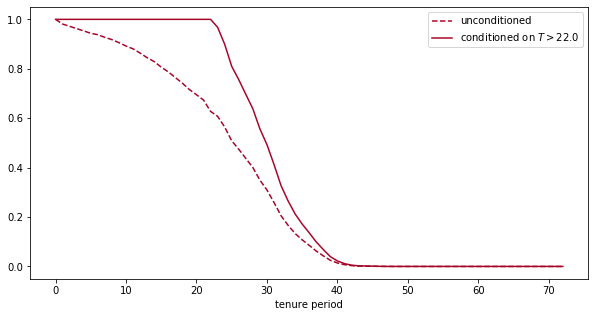

In [36]:
# investigate individual customers and see how the conditioning has affected their survival over the base line
plt.figure(figsize=(10, 5))
subject = customer
unconditioned_sf[subject].plot(ls="--", color="#A60628", label="unconditioned") 
conditioned_sf[subject].plot(color="#A60628", label=("conditioned on $T>%s$" % data.loc[subject]['tenure'])) # T>34 indicate that the customer is active even after 58 months
plt.xlabel('tenure period')
plt.legend()

### Getting actionable insights out of the model

In [37]:
from lifelines.utils import median_survival_times, qth_survival_times

In [38]:
# Predict the month number where the survival chance of customer is 50%
# This can also be modified as predictions_50 = qth_survival_times(.50, conditioned_sf), where the percentile can be modified depending on our requirement 
percentile = 0.5
predictions_50 = qth_survival_times(percentile, conditioned_sf)
# predictions_10 = qth_survival_times(.10, conditioned_sf) #This provides the month where survival chance of customer is 10%

In [39]:
predictions_50

,7590-VHVEG,5575-GNVDE,7795-CFOCW,1452-KIOVK,6713-OKOMC,6388-TABGU,9763-GRSKD,7469-LKBCI,8091-TTVAX,5129-JLPIS,3655-SNQYZ,8191-XWSZG,9959-WOFKT,4183-MYFRB,1680-VDCWW,3638-WEABW,6322-HRPFA,6865-JZNKO,5248-YGIJN,3841-NFECX,4929-XIHVW,6827-IEAUQ,7310-EGVHZ,3413-BMNZE,6234-RAAPL,6572-ADKRS,8865-TNMNX,9489-DEDVP,9867-JCZSP,4671-VJLCL,4080-IIARD,3714-NTNFO,5948-UJZLF,7639-LIAYI,2954-PIBKO,8012-SOUDQ,6575-SUVOI,4667-QONEA,8769-KKTPH,5067-XJQFU,3957-SQXML,5954-BDFSG,0434-CSFON,1215-FIGMP,0526-SXDJP,0557-ASKVU,5122-CYFXA,8627-ZYGSZ,3410-YOQBQ,3170-NMYVV,...,1904-WAJAA,5130-YPIRV,2843-CQMEG,6439-PKTRR,5351-QESIO,5568-DMXZS,8468-FZTOE,6633-SYEUS,6447-GORXK,6967-PEJLL,5981-ZVXOT,1684-FLBGS,1389-WNUIB,0376-OIWME,0218-QNVAS,0804-YGEQV,7164-BPTUT,2523-EWWZL,0928-XUTSN,0052-YNYOT,9586-JGQKH,4501-VCPFK,6075-SLNIL,9347-AERRL,2274-XUATA,6691-CCIHA,1685-BQULA,9053-EJUNL,0666-UXTJO,1471-GIQKQ,4807-IZYOZ,9710-NJERN,9837-FWLCH,7203-OYKCT,1035-IPQPU,7398-LXGYX,2823-LKABH,0550-DCXLH,9281-CEDRU,2235-DWLJU,0871-OPBXW,3605-JISKB,9767-FFLEM,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,3186-AJIEK
0.5,23.0,49.0,61.0,30.0,27.0,71.0,25.0,69.0,inf,33.0,inf,61.0,inf,27.0,53.0,inf,61.0,39.0,inf,inf,5.0,50.0,39.0,17.0,inf,53.0,32.0,inf,53.0,inf,25.0,54.0,14.0,inf,inf,51.0,38.0,inf,inf,inf,inf,inf,56.0,69.0,inf,40.0,11.0,61.0,66.0,inf,...,64.0,inf,32.0,inf,23.0,18.0,inf,33.0,40.0,55.0,53.0,36.0,42.0,45.0,inf,61.0,inf,34.0,18.0,69.0,inf,38.0,49.0,56.0,inf,inf,50.0,49.0,42.0,14.0,inf,70.0,40.0,inf,72.0,54.0,25.0,22.0,inf,19.0,33.0,69.0,43.0,26.0,36.0,inf,42.0,inf,30.0,inf


In [40]:
predictions_50[[customer]]

,1452-KIOVK
0.5,30.0


In [41]:
# Investigate the predicted remeaining value that a customer has for the business 
values = predictions_50.T.join(data[['MonthlyCharges','tenure']])
values['RemainingValue'] = values['MonthlyCharges'] * (values[0.5] - values['tenure']) # With this we can predict which customers might inflict the highest damage to the business

In [42]:
values.loc[[customer]]

,0.5,MonthlyCharges,tenure,RemainingValue
1452-KIOVK,30.0,89.1,22,712.8


## Churn prevention - What can we do to keep them?

In [43]:
# Through coefficient chart we concluded that these 4 features i.e. Contract_Two year, Contract_One year, PaymentMethod_Credit card (automatic), PaymentMethod_Bank transfer (automatic)
# promotes the survival chances positively, so let's focus on those i.e reverse the existing values and see the resulting survival chances

upgrades = ['PaymentMethod_Credit card (automatic)', 'PaymentMethod_Bank transfer (automatic)', 'Contract_One year', 'Contract_Two year']
results_dict = {}

# Run this for all the customers 
actual = data.loc[[customer]]
change = data.loc[[customer]]
results_dict[customer] = [cph.predict_median(actual)]
for upgrade in upgrades:
    change[upgrade] = 1 if list(change[upgrade]) == [0] else 0
    results_dict[customer].append(cph.predict_median(change))
    change[upgrade] = 1 if list(change[upgrade]) == [0] else 0

In [44]:
results_dict

{'1452-KIOVK': [26.0, 22.0, 30.0, 37.0, 55.0]}

In [45]:
result_df = pd.DataFrame(results_dict).T
result_df.columns = ['baseline'] + upgrades
actions = values.join(result_df).drop([0.5], axis=1)

In [46]:
data.loc[[customer],upgrades]

,PaymentMethod_Credit card (automatic),PaymentMethod_Bank transfer (automatic),Contract_One year,Contract_Two year
customerID,,,,
1452-KIOVK,1,0,0,0


In [47]:
# Notice that if we get the 1st customer to use CC we increase the survival period of cust '5575-GNVDE' by 5 months i.e. 46(baseline) -> 51(PaymentMethod_Credit card (automatic)) and so on..
# Note: Cust 5575-GNVDE was already having Contract_One year, after reverting it we can see that the survival chances goes down from 46 to 37
actions.loc[[customer]]

,MonthlyCharges,tenure,RemainingValue,baseline,PaymentMethod_Credit card (automatic),PaymentMethod_Bank transfer (automatic),Contract_One year,Contract_Two year
1452-KIOVK,89.1,22,712.8,26.0,22.0,30.0,37.0,55.0


##### Calculate what impact it has financially 

In [48]:
actions['CreditCard Diff'] = (actions['PaymentMethod_Credit card (automatic)'] - actions['baseline']) * actions['MonthlyCharges'] 
actions['BankTransfer Diff'] = (actions['PaymentMethod_Bank transfer (automatic)'] - actions['baseline']) * actions['MonthlyCharges']
actions['1yrContract Diff'] = (actions['Contract_One year'] - actions['baseline']) * actions['MonthlyCharges']
actions['2yrContract Diff'] = (actions['Contract_Two year'] - actions['baseline']) * actions['MonthlyCharges']

In [49]:
actions.loc[[customer]]

,MonthlyCharges,tenure,RemainingValue,baseline,PaymentMethod_Credit card (automatic),PaymentMethod_Bank transfer (automatic),Contract_One year,Contract_Two year,CreditCard Diff,BankTransfer Diff,1yrContract Diff,2yrContract Diff
1452-KIOVK,89.1,22,712.8,26.0,22.0,30.0,37.0,55.0,-356.4,356.4,980.1,2583.9


### Accuracy and Calibration
#### Calibration is the propensity of the model to get probabilities right over time (i.e. having high recall value)

In [50]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss
import numpy as np

In [51]:
cph_test.head()

,gender_Female,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,MonthlyCharges,TotalCharges,tenure,Churn_Yes
customerID,,,,,,,,,,,,,,,,,,,,,,
8999-BOHSE,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,89.70,1047.70,11,1
2277-BKJKN,1,1,0,1,0,0,1,0,1,0,1,1,0,1,1,0,0,1,99.20,7213.75,71,0
4701-MLJPN,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,55.25,1715.65,31,1
3331-HQDTW,1,0,0,1,1,0,1,1,1,0,1,1,0,0,1,0,0,0,109.80,3587.25,34,1
6646-JPPHA,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,78.85,1043.80,14,0


Text(0.5, 1.0, 'Calibration plots (reliability curve)')

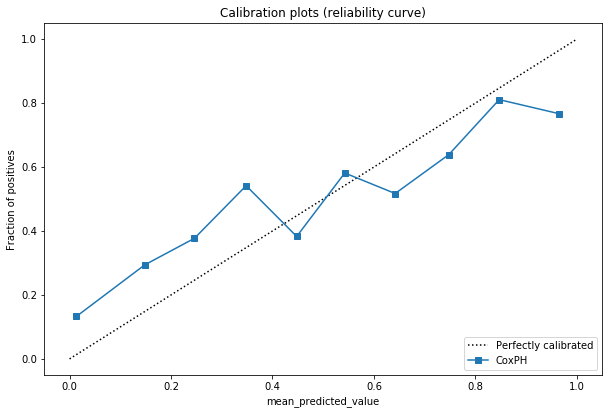

In [52]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2) 
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated") 

probs = 1-np.array(cph.predict_survival_function(cph_test).loc[13]) # here tenure=13

actual = cph_test['Churn_Yes']

fraction_of_positives, mean_predicted_value = calibration_curve(actual, probs, n_bins=10, normalize=False) 

ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s" % ("CoxPH"))

ax1.set_ylabel("Fraction of positives") 
ax1.set_ylim([-0.05, 1.05]) 
ax1.set_xlabel("mean_predicted_value") 
ax1.legend(loc="lower right") 
ax1.set_title('Calibration plots (reliability curve)')

In [53]:
# To understand how far away the line is from the perfect calibration we use brier_score_loss
brier_score_loss(cph_test['Churn_Yes'], 1-np.array(cph.predict_survival_function(cph_test).loc[13]), pos_label=1)

0.1622027447782147

/Users/pbhagwat/DEV/CohortAnalysis/venv/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


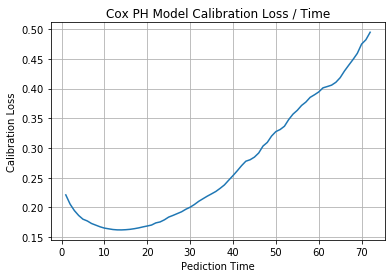

In [55]:
# Inspect the calibration of the model at all the time periods (above one is just for tenure=13)
loss_dict = {}
for i in range(1,73):
    score=brier_score_loss(cph_test['Churn_Yes'], 1-np.array(cph.predict_survival_function(cph_test).loc[i]), pos_label=1)
    loss_dict[i] = [score]
    
loss_df = pd.DataFrame(loss_dict).T

fig, ax = plt.subplots()
ax.plot(loss_df.index, loss_df.values)

ax.set(xlabel='Pediction Time', ylabel='Calibration Loss', title='Cox PH Model Calibration Loss / Time')
ax.grid()

# Here we can see that the model is well caliberated b/w 5 and 25 months
plt.show() 

In [56]:
# upper and lower bounds for the expected return on investment from getting customers to make changes
loss_df.columns = ['loss'] 

temp_df = actions.reset_index().set_index('PaymentMethod_Credit card (automatic)').join(loss_df) 
temp_df = temp_df.set_index('index') 
actions['CreditCard Lower'] = temp_df['CreditCard Diff'] - (temp_df['loss'] * temp_df['CreditCard Diff']) 
actions['CreditCard Upper'] = temp_df['CreditCard Diff'] + (temp_df['loss'] * temp_df['CreditCard Diff']) 

temp_df = actions.reset_index().set_index('PaymentMethod_Bank transfer (automatic)').join(loss_df) 
temp_df = temp_df.set_index('index') 
actions['BankTransfer Lower'] = temp_df['BankTransfer Diff'] - (.5 * temp_df['loss'] * temp_df['BankTransfer Diff']) 
actions['BankTransfer Upper'] = temp_df['BankTransfer Diff'] + (.5 * temp_df['loss'] * temp_df['BankTransfer Diff']) 

temp_df = actions.reset_index().set_index('Contract_One year').join(loss_df) 
temp_df = temp_df.set_index('index') 
actions['1yrContract Lower'] = temp_df['1yrContract Diff'] - (.5 * temp_df['loss'] * temp_df['1yrContract Diff']) 
actions['1yrContract Upper'] = temp_df['1yrContract Diff'] + (.5 * temp_df['loss'] * temp_df['1yrContract Diff']) 

temp_df = actions.reset_index().set_index('Contract_Two year').join(loss_df) 
temp_df = temp_df.set_index('index') 
actions['2yrContract Lower'] = temp_df['2yrContract Diff'] - (.5 * temp_df['loss'] * temp_df['2yrContract Diff']) 
actions['2yrContract Upper'] = temp_df['2yrContract Diff'] + (.5 * temp_df['loss'] * temp_df['2yrContract Diff'])

In [57]:
actions.loc[[customer]]

,MonthlyCharges,tenure,RemainingValue,baseline,PaymentMethod_Credit card (automatic),PaymentMethod_Bank transfer (automatic),Contract_One year,Contract_Two year,CreditCard Diff,BankTransfer Diff,1yrContract Diff,2yrContract Diff,CreditCard Lower,CreditCard Upper,BankTransfer Lower,BankTransfer Upper,1yrContract Lower,1yrContract Upper,2yrContract Lower,2yrContract Upper
1452-KIOVK,89.1,22,712.8,26.0,22.0,30.0,37.0,55.0,-356.4,356.4,980.1,2583.9,-294.411125,-418.388875,320.706279,392.093721,866.386099,1093.813901,2114.560953,3053.239047
